In [26]:
import pandas as pd

# from config import api_key

import numpy as np
import requests
import json

In [ ]:
# Import files as DataFrames
fourteen_fiftenn_pd = pd.read_csv("draft_data/2014-15.csv")
seventeen_eighteen_pd = pd.read_csv("draft_data/2017-18.csv", encoding = "ISO-8859-1")
twenty_twentyone = pd.read_csv("draft_data/2020-21.csv", encoding = "ISO-8859-1")

In [ ]:
# Rename columns to be uniform across dataframes
twenty_twentyone.rename(columns={"Facility name":"Facility Name"}, inplace=True)

In [ ]:
# Remove rows of corporate total data
fourteen_fiftenn_pd = fourteen_fiftenn_pd[fourteen_fiftenn_pd['Facility Name'] != 'Corporate Total']
seventeen_eighteen_pd = seventeen_eighteen_pd[seventeen_eighteen_pd['Facility Name'] != 'Corporate Total']
twenty_twentyone = twenty_twentyone[twenty_twentyone['Facility Name'] != 'Corporate Total']

In [ ]:
# Drop columns of un-needed data
fourteen_fiftenn_pd = fourteen_fiftenn_pd.drop(columns={"Type", "Scope 1 (t CO2-e)","Scope 2 (t CO2-e)","Total Emissions (t CO2-e)", "Emission  Intensity (t/Mwh)", "Grid Connected", "Grid", "Important Notes"})
seventeen_eighteen_pd = seventeen_eighteen_pd.drop(columns={"Type", "Total Scope 1 Emissions \n(t CO2-e)","Total Scope 2 Emissions \n(t CO2-e)","Total Emissions \n(t CO2-e)", "Emission Intensity \n(t CO2-e/ MWh)", "Grid Connected", "Grid"})
twenty_twentyone = twenty_twentyone.drop(columns={"Type", "Total scope 1 emissions \n(t CO2-e)","Total scope 2 emissions \n(t CO2-e)","Total emissions \n(t CO2-e)", "Emission intensity \n(t CO2-e/ MWh)", "Grid connected", "Grid"})


In [ ]:
# Add year column for filtering in plots
fourteen_fiftenn_pd['Year'] = '2014-2015'

seventeen_eighteen_pd['Year'] = '2017-2018'

twenty_twentyone['Year'] = '2020-2021'

In [ ]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in fourteen_fiftenn_pd.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    location = row['Facility Name']
    state = row['State']

    # update address key value
    params['address'] = f"{location}+{state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
#     # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        fourteen_fiftenn_pd.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        fourteen_fiftenn_pd.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        fourteen_fiftenn_pd.loc[index, "Lat"] = "NaN"
        fourteen_fiftenn_pd.loc[index, "Lng"] = "NaN"

# Visualize to confirm lat lng appear
fourteen_fiftenn_pd.head()

In [ ]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in seventeen_eighteen_pd.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    location = row['Facility Name']
    state = row['State']

    # update address key value
    params['address'] = f"{location}+{state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
#     # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        seventeen_eighteen_pd.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        seventeen_eighteen_pd.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        seventeen_eighteen_pd.loc[index, "Lat"] = "NaN"
        seventeen_eighteen_pd.loc[index, "Lng"] = "NaN"

seventeen_eighteen_pd.head()

In [ ]:
# create a params dict that will be updated with new city each iteration
params = {"key": api_key}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in twenty_twentyone.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    location = row['Facility Name']
    state = row['State']

    # update address key value
    params['address'] = f"{location} + {state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
#     # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        twenty_twentyone.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
        twenty_twentyone.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        twenty_twentyone.loc[index, "Lat"] = "NaN"
        twenty_twentyone.loc[index, "Lng"] = "NaN"

twenty_twentyone.head()

In [ ]:
# Drop rows which returned no coordinates for facilities
fourteen_fiftenn_pd = fourteen_fiftenn_pd[fourteen_fiftenn_pd['Lat'] != 'NaN']

seventeen_eighteen_pd = seventeen_eighteen_pd[seventeen_eighteen_pd['Lat'] != 'NaN']

twenty_twentyone = twenty_twentyone[twenty_twentyone['Lat'] != 'NaN']

In [ ]:
twenty_twentyone.head()

In [ ]:
# fourteen_fifteen, seventeen_eighteen, twenty_twentyone
# filter each df to group by state and then group by again to show primary fuel types

In [ ]:
# // Energy Tables: Titled 14_15_Energy_Production, 17_18_Energy_Production & 20_21_Energy_Production
# // Energy Tables Column Headers:
# // # Reporting entity
# // # Facility name
# // # State
# // # Electricity production (GJ)
# // # Electricity production (MWh)

# DELETE THESE COLUMNS
# // # Total scope 1 emissions (t CO2-e)
# // # Total scope 2 emissions (t CO2-e)
# // # Total emissions (t CO2-e)
# // # Emission intensity (t CO2-e/ MWh)
# // # Grid connected
# // # Grid

# // # Primary fuel
# Lat
# Long
# // # Year
# // # Renewable

# // Population Table Titled Aus_Population
# // Aus_Population Column Headers:
# // # State
# // # Male
# // # Female
# // # Total

# // Income Table Titled Aus_Income
# // Aus_Income Column Headers:
# // # State
# // # Median Income

In [ ]:
# fourteen_fifteen_cols = ["Reporting_Entity", "Facility_Name", "State", "Electricity_Production_GJ", "Electricity_Production_MWh","Primary_Fuel", "Lat", "Long", "Year"]
# fourteen_fifteen_transformed = fourteen_fiftenn_pd[fourteen_fifteen_cols].copy()

fourteen_fifteen_transformed = fourteen_fiftenn_pd.rename(columns={"Reporting Entity ": "Reporting_Entity",
                                                                   "Facility Name": "Facility_Name",
                                                                   "Electricity Production (GJ)": "Electricity_Production_GJ",
                                                                   "Electricity Production (Mwh)": "Electricity_Production_MWh",
                                                                   "Primary Fuel": "Primary_Fuel"})

In [ ]:
# seventeen_eighteen_cols = ["Reporting_Entity", "Facility_Name", "State", "Electricity_Production_GJ", "Electricity_Production_MWh","Primary_Fuel", "Lat", "Long", "Year"]
# seventeen_eighteen_transformed = seventeen_eighteen_pd[seventeen_eighteen_cols].copy()

seventeen_eighteen_transformed = seventeen_eighteen_pd.rename(columns={"Reporting Entity": "Reporting_Entity",
                                                                   "Facility Name": "Facility_Name",
                                                                   "Electricity Production (GJ)": "Electricity_Production_GJ",
                                                                   "Electricity Production (MWh)": "Electricity_Production_MWh",
                                                                   "Primary Fuel": "Primary_Fuel"})

In [ ]:
# seventeen_eighteen_cols = ["Reporting_Entity", "Facility_Name", "State", "Electricity_Production_GJ", "Electricity_Production_MWh","Primary_Fuel", "Lat", "Long", "Year"]
# seventeen_eighteen_transformed = seventeen_eighteen_pd[seventeen_eighteen_cols].copy()

twenty_twentyone_transformed = twenty_twentyone.rename(columns={"Reporting entity": "Reporting_Entity",
                                                                   "Facility Name": "Facility_Name",
                                                                   "Electricity production (GJ)": "Electricity_Production_GJ",
                                                                   "Electricity production (MWh)": "Electricity_Production_MWh",
                                                                   "Primary fuel": "Primary_Fuel"})

In [ ]:
renewables = ['Hydro', 'Landfill Gas', 'Wind', 'Solar', 'Bagasse', 'Biofuel', 'Macadamia Nut Shells', 'Biogas']

fourteen_fifteen_transformed['Renewable'] = fourteen_fifteen_transformed.Primary_Fuel.isin(renewables)
seventeen_eighteen_transformed['Renewable'] = seventeen_eighteen_transformed.Primary_Fuel.isin(renewables)
twenty_twentyone_transformed['Renewable'] = twenty_twentyone_transformed.Primary_Fuel.isin(renewables)

In [ ]:
fourteen_fifteen_transformed.drop(columns=['index'], inplace=True)

In [ ]:
twenty_twentyone_transformed.head()

In [ ]:
seventeen_eighteen_transformed.drop(columns=['index'], inplace=True)
twenty_twentyone_transformed.drop(columns=['index'], inplace=True)

In [ ]:
# import psycopg2

# connection_string = "postgres:postgres@localhost:5432/energy_db"
# engine = create_engine(f'postgresql://{connection_string}')

# # Confirm tables
# engine.table_names()

# fourteen_fifteen_transformed.to_sql(name='Fourteen_Fifteen_Energy_Production', con=engine, if_exists='append', index=False)
# seventeen_eighteen_transformed.to_sql(name='Seventeen_Eighteen_Energy_Production', con=engine, if_exists='append', index=False)
# twenty_twentyone_transformed.to_sql(name='Twenty_Twentyone_Energy_Production', con=engine, if_exists='append', index=False)

In [27]:
fourteen_fifteen_transformed.to_csv('transformed_csvs/14-15.csv')
seventeen_eighteen_transformed.to_csv('transformed_csvs/17-18.csv')
twenty_twentyone_transformed.to_csv('transformed_csvs/20-21.csv')

NameError: name 'fourteen_fifteen_transformed' is not defined

In [28]:
# Import files as DataFrames
ff_transformed = pd.read_csv("transformed_csvs/14-15.csv")
se_transformed = pd.read_csv("transformed_csvs/17-18.csv")
tt_transformed = pd.read_csv("transformed_csvs/20-21.csv")

In [3]:
import pandas as pd

In [29]:
import pymongo

# Setup connection to mongodb
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Create database and collection to use
db = client['energy_db']


In [ ]:
fourt_fift_energy_production = db.Fourteen_Fifteen_Energy_Production
sevt_eight_energy_production = db.Seventeen_Eighteen_Energy_Production
twe_twentyo_energy_production = db.Twenty_Twentyone_Energy_Production
aus_population = db.Aus_Population
aus_income = db.Aus_Income

In [ ]:
fourt_fift_energy_production.insert_many(ff_transformed.to_dict('records'))
sevt_eight_energy_production.insert_many(se_transformed.to_dict('records'))
twe_twentyo_energy_production.insert_many(tt_transformed.to_dict('records'))

visualisation that shows each state renewables growth? Ie, a double bar graph, showing the amount of renewable plants in WA in 2013 next to the amount of renewable plants in WA in 2020 Using Dataframes 14/15, 17/18 & 20/21.


In [ ]:
# ff_transformed
# se_transformed
# tt_transformed

In [30]:
ff_transformed_progression = ff_transformed[["State", "Year", "Renewable"]]
ff_transformed_progression.head(2)

,State,Year,Renewable
0,NSW,2014-2015,True
1,ACT,2014-2015,True


In [31]:
ff_transformed_progression_renewable = ff_transformed_progression.loc[ff_transformed_progression["Renewable"] == True]
ff_transformed_progression_renewable

,State,Year,Renewable
0,NSW,2014-2015,True
1,ACT,2014-2015,True
2,VIC,2014-2015,True
3,VIC,2014-2015,True
5,VIC,2014-2015,True
...,...,...,...
290,SA,2014-2015,True
291,SA,2014-2015,True
297,NSW,2014-2015,True
298,QLD,2014-2015,True


In [32]:
# group dataframe by State
ff_transformed_progression_renewable_grouped = ff_transformed_progression_renewable.groupby(["State"], as_index=False).count()
ff_transformed_progression_renewable_grouped

,State,Year,Renewable
0,ACT,4,4
1,NSW,38,38
2,NT,2,2
3,QLD,14,14
4,SA,10,10
5,TAS,26,26
6,VIC,37,37
7,WA,15,15


In [33]:
# format DF
ff_transformed_progression_renewable_grouped = ff_transformed_progression_renewable_grouped[["State", "Renewable"]]
ff_transformed_progression_renewable_grouped.rename(columns={'Renewable': 'Renewable_Energy_Plants_2014_2015'}, inplace=True)
ff_transformed_progression_renewable_grouped

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,State,Renewable_Energy_Plants_2014_2015
0,ACT,4
1,NSW,38
2,NT,2
3,QLD,14
4,SA,10
5,TAS,26
6,VIC,37
7,WA,15


In [34]:
ff_transformed_progression_nonrenewable = ff_transformed_progression.loc[ff_transformed_progression["Renewable"] == False]
# ff_transformed_progression_nonrenewable

# group dataframe by State
ff_transformed_progression_nonrenewable_grouped = ff_transformed_progression_nonrenewable.groupby(["State"], as_index=False).count()
# ff_transformed_progression_nonrenewable_grouped

# format DF
ff_transformed_progression_nonrenewable_grouped = ff_transformed_progression_nonrenewable_grouped[["State", "Renewable"]]
ff_transformed_progression_nonrenewable_grouped.rename(columns={'Renewable': 'Non_Renewable_Energy_Plants_2014_2015'}, inplace=True)
ff_transformed_progression_nonrenewable_grouped

,State,Non_Renewable_Energy_Plants_2014_2015
0,NSW,32
1,NT,13
2,QLD,30
3,SA,13
4,TAS,2
5,VIC,17
6,WA,63


In [35]:
energy_progression_merged = pd.merge(ff_transformed_progression_renewable_grouped, ff_transformed_progression_nonrenewable_grouped, how="left", on=["State", "State"])
# energy_progression_merged

In [36]:
se_transformed_progression = se_transformed[["State", "Year", "Renewable"]]
se_transformed_progression.head(2)

,State,Year,Renewable
0,NSW,2017-2018,True
1,VIC,2017-2018,True


In [37]:
se_transformed_progression_renewable = se_transformed_progression.loc[se_transformed_progression["Renewable"] == True]
# se_transformed_progression_renewable

# group dataframe by State
se_transformed_progression_renewable_grouped = se_transformed_progression_renewable.groupby(["State"], as_index=False).count()
# se_transformed_progression_renewable_grouped

# format DF
se_transformed_progression_renewable_grouped = se_transformed_progression_renewable_grouped[["State", "Renewable"]]
se_transformed_progression_renewable_grouped.rename(columns={'Renewable': 'Renewable_Energy_Plants_2017_2018'}, inplace=True)
se_transformed_progression_renewable_grouped

,State,Renewable_Energy_Plants_2017_2018
0,ACT,3
1,NSW,45
2,NT,2
3,QLD,14
4,SA,12
5,TAS,28
6,VIC,40
7,WA,20


In [38]:
energy_progression_merged = pd.merge(energy_progression_merged, se_transformed_progression_renewable_grouped, how="left", on=["State", "State"])
# energy_progression_merged

In [39]:
se_transformed_progression_nonrenewable = se_transformed_progression.loc[se_transformed_progression["Renewable"] == False]
# se_transformed_progression_nonrenewable

# group dataframe by State
se_transformed_progression_nonrenewable_grouped = se_transformed_progression_nonrenewable.groupby(["State"], as_index=False).count()
# se_transformed_progression_nonrenewable_grouped

# format DF
se_transformed_progression_nonrenewable_grouped = se_transformed_progression_nonrenewable_grouped[["State", "Renewable"]]
se_transformed_progression_nonrenewable_grouped.rename(columns={'Renewable': 'Non_Renewable_Energy_Plants_2017_2018'}, inplace=True)
se_transformed_progression_nonrenewable_grouped

,State,Non_Renewable_Energy_Plants_2017_2018
0,NSW,28
1,NT,64
2,QLD,32
3,SA,12
4,VIC,14
5,WA,71


In [40]:
energy_progression_merged = pd.merge(energy_progression_merged, se_transformed_progression_nonrenewable_grouped, how="left", on=["State", "State"])
# energy_progression_merged

In [41]:
tt_transformed_progression = tt_transformed[["State", "Year", "Renewable"]]
tt_transformed_progression.head(2)

,State,Year,Renewable
0,NSW,2020-2021,True
1,VIC,2020-2021,True


In [42]:
tt_transformed_progression_renewable = tt_transformed_progression.loc[tt_transformed_progression["Renewable"] == True]
# tt_transformed_progression_renewable

# group dataframe by State
tt_transformed_progression_renewable_grouped = tt_transformed_progression_renewable.groupby(["State"], as_index=False).count()
# tt_transformed_progression_renewable_grouped

# format DF
tt_transformed_progression_renewable_grouped = tt_transformed_progression_renewable_grouped[["State", "Renewable"]]
tt_transformed_progression_renewable_grouped.rename(columns={'Renewable': 'Renewable_Energy_Plants_2020_2021'}, inplace=True)
tt_transformed_progression_renewable_grouped

,State,Renewable_Energy_Plants_2020_2021
0,ACT,5
1,NSW,64
2,NT,3
3,QLD,46
4,SA,16
5,TAS,30
6,VIC,55
7,WA,22


In [43]:
energy_progression_merged = pd.merge(energy_progression_merged, tt_transformed_progression_renewable_grouped, how="left", on=["State", "State"])
# energy_progression_merged

In [44]:
tt_transformed_progression_nonrenewable = tt_transformed_progression.loc[tt_transformed_progression["Renewable"] == False]
# tt_transformed_progression_nonrenewable

# group dataframe by State
tt_transformed_progression_nonrenewable_grouped = tt_transformed_progression_nonrenewable.groupby(["State"], as_index=False).count()
# tt_transformed_progression_nonrenewable_grouped

# format DF
tt_transformed_progression_nonrenewable_grouped = tt_transformed_progression_nonrenewable_grouped[["State", "Renewable"]]
tt_transformed_progression_nonrenewable_grouped.rename(columns={'Renewable': 'Non_Renewable_Energy_Plants_2020_2021'}, inplace=True)
tt_transformed_progression_nonrenewable_grouped

,State,Non_Renewable_Energy_Plants_2020_2021
0,NSW,22
1,NT,63
2,QLD,65
3,SA,15
4,VIC,14
5,WA,71


In [45]:
energy_progression_merged = pd.merge(energy_progression_merged, tt_transformed_progression_nonrenewable_grouped, how="left", on=["State", "State"])
energy_progression_merged = energy_progression_merged.fillna(0)
energy_progression_merged

,State,Renewable_Energy_Plants_2014_2015,Non_Renewable_Energy_Plants_2014_2015,Renewable_Energy_Plants_2017_2018,Non_Renewable_Energy_Plants_2017_2018,Renewable_Energy_Plants_2020_2021,Non_Renewable_Energy_Plants_2020_2021
0,ACT,4,0.0,3,0.0,5,0.0
1,NSW,38,32.0,45,28.0,64,22.0
2,NT,2,13.0,2,64.0,3,63.0
3,QLD,14,30.0,14,32.0,46,65.0
4,SA,10,13.0,12,12.0,16,15.0
5,TAS,26,2.0,28,0.0,30,0.0
6,VIC,37,17.0,40,14.0,55,14.0
7,WA,15,63.0,20,71.0,22,71.0


Which state produces the most energy per capita? which state produces the least? Divided into renewable vs non renewable.

In [50]:
# Read in CSV
population_summary = pd.read_csv("state_population_summary.csv")

# format DF
population_summary.rename(columns={"Unnamed: 0": "State", "Total": "Population_Total"}, inplace=True)
population_summary = population_summary[["State", "Population_Total"]]

# Removing the Australia(b) total line in index 8
population_summary = population_summary.drop(8)

population_summary

,State,Population_Total
0,New South Wales,8072163
1,Victoria,6503491
2,Queensland,5156138
3,South Australia,1781516
4,Western Australia,2660026
5,Tasmania,557571
6,Northern Territory,232605
7,Australian Capital Territory,454499


In [51]:
population_summary.at[0, 'State'] = "NSW"
population_summary.at[1, 'State'] = "VIC"
population_summary.at[2, 'State'] = "QLD"
population_summary.at[3, 'State'] = "SA"
population_summary.at[4, 'State'] = "WA"
population_summary.at[5, 'State'] = "TAS"
population_summary.at[6, 'State'] = "NT"
population_summary.at[7, 'State'] = "ACT"
population_summary

,State,Population_Total
0,NSW,8072163
1,VIC,6503491
2,QLD,5156138
3,SA,1781516
4,WA,2660026
5,TAS,557571
6,NT,232605
7,ACT,454499


In [ ]:
# # you can do multiple replacements in within one call of the replace method by creating a mapping dictionary
# # very scalable woo
# replacement_mapping_dict = {
#     "New South Wales": "NSW",
#     "Victoria": "VIC",
#     "Queensland": "QLD",
#     "South Australia": "SA",
#     "Western Australia": "WA",
#     "Tasmania": "TAS",
#     "Northern Territory": "NT",
#     "Australian Capital Territory": "ACT",
# }
# population_summary["State"].replace(replacement_mapping_dict, regex=True)

# population_summary

In [ ]:
# energy_per_capita = state_population_summary.csv

In [52]:
tt_eppc = tt_transformed[["State", "Electricity_Production_MWh", "Renewable"]]
# tt_eppc

tt_eppc_renewable = tt_eppc.loc[tt_eppc["Renewable"] == True]
# tt_eppc_renewable

tt_eppc_renewable = tt_eppc_renewable[["State", "Electricity_Production_MWh"]]
# tt_eppc_renewable

tt_eppc_renewable.replace(',','', regex=True, inplace=True)
tt_eppc_renewable = tt_eppc_renewable.fillna(0)

# convert column "a" of a DataFrame
tt_eppc_renewable["Electricity_Production_MWh"] = pd.to_numeric(tt_eppc_renewable["Electricity_Production_MWh"])
tt_eppc_renewable

# group dataframe by State
tt_eppc_renewable_grouped = tt_eppc_renewable.groupby(["State"], as_index=False).sum()
# tt_eppc_renewable_grouped

# format DF
tt_eppc_renewable_grouped.rename(columns={'Electricity_Production_MWh': 'Renewable_Electricity_Production_MWh'}, inplace=True)
tt_eppc_renewable_grouped

,State,Renewable_Electricity_Production_MWh
0,ACT,90253
1,NSW,13462111
2,NT,12510
3,QLD,4746457
4,SA,2954495
5,TAS,7237693
6,VIC,7782048
7,WA,3085980


In [53]:
tt_eppc = tt_transformed[["State", "Electricity_Production_MWh", "Renewable"]]
# tt_eppc

tt_eppc_non_renewable = tt_eppc.loc[tt_eppc["Renewable"] == False]
# tt_eppc_non_renewable

tt_eppc_non_renewable = tt_eppc_non_renewable[["State", "Electricity_Production_MWh"]]
# tt_eppc_non_renewable

tt_eppc_non_renewable.replace(',','', regex=True, inplace=True)
tt_eppc_non_renewable = tt_eppc_non_renewable.fillna(0)

# convert column "a" of a DataFrame
tt_eppc_non_renewable["Electricity_Production_MWh"] = pd.to_numeric(tt_eppc_non_renewable["Electricity_Production_MWh"])
tt_eppc_non_renewable

# group dataframe by State
tt_eppc_non_renewable_grouped = tt_eppc_non_renewable.groupby(["State"], as_index=False).sum()
# tt_eppc_non_renewable_grouped

# format DF
tt_eppc_non_renewable_grouped.rename(columns={'Electricity_Production_MWh': 'Non_Renewable_Electricity_Production_MWh'}, inplace=True)
tt_eppc_non_renewable_grouped

,State,Non_Renewable_Electricity_Production_MWh
0,NSW,52599995
1,NT,2138763
2,QLD,59168403
3,SA,4901653
4,VIC,35279030
5,WA,20464224


In [54]:
eppc_merged = pd.merge(tt_eppc_renewable_grouped, tt_eppc_non_renewable_grouped, how="left", on=["State", "State"])
eppc_merged

eppc_merged = eppc_merged.fillna(0)

eppc_merged

,State,Renewable_Electricity_Production_MWh,Non_Renewable_Electricity_Production_MWh
0,ACT,90253,0.0
1,NSW,13462111,52599995.0
2,NT,12510,2138763.0
3,QLD,4746457,59168403.0
4,SA,2954495,4901653.0
5,TAS,7237693,0.0
6,VIC,7782048,35279030.0
7,WA,3085980,20464224.0


In [55]:
eppc_merged = pd.merge(eppc_merged, population_summary, how="left", on=["State", "State"])
eppc_merged

,State,Renewable_Electricity_Production_MWh,Non_Renewable_Electricity_Production_MWh,Population_Total
0,ACT,90253,0.0,454499
1,NSW,13462111,52599995.0,8072163
2,NT,12510,2138763.0,232605
3,QLD,4746457,59168403.0,5156138
4,SA,2954495,4901653.0,1781516
5,TAS,7237693,0.0,557571
6,VIC,7782048,35279030.0,6503491
7,WA,3085980,20464224.0,2660026


In [56]:
# create a column for "Per Student Budget" in the school_summary_merge dataframe
eppc_merged['Renewable_MWh_Per_Capita'] = eppc_merged['Renewable_Electricity_Production_MWh'] / eppc_merged['Population_Total'] 
eppc_merged['Non_Renewable_MWh_Per_Capita'] = eppc_merged['Non_Renewable_Electricity_Production_MWh'] / eppc_merged['Population_Total'] 

eppc_merged

,State,Renewable_Electricity_Production_MWh,Non_Renewable_Electricity_Production_MWh,Population_Total,Renewable_MWh_Per_Capita,Non_Renewable_MWh_Per_Capita
0,ACT,90253,0.0,454499,0.198577,0.000000
1,NSW,13462111,52599995.0,8072163,1.667720,6.516221
2,NT,12510,2138763.0,232605,0.053782,9.194828
3,QLD,4746457,59168403.0,5156138,0.920545,11.475333
4,SA,2954495,4901653.0,1781516,1.658416,2.751394
5,TAS,7237693,0.0,557571,12.980756,0.000000
6,VIC,7782048,35279030.0,6503491,1.196595,5.424630
7,WA,3085980,20464224.0,2660026,1.160132,7.693242


In [57]:
energy_production_per_capita = eppc_merged[["State", "Renewable_MWh_Per_Capita", "Non_Renewable_MWh_Per_Capita"]]
energy_production_per_capita

,State,Renewable_MWh_Per_Capita,Non_Renewable_MWh_Per_Capita
0,ACT,0.198577,0.000000
1,NSW,1.667720,6.516221
2,NT,0.053782,9.194828
3,QLD,0.920545,11.475333
4,SA,1.658416,2.751394
5,TAS,12.980756,0.000000
6,VIC,1.196595,5.424630
7,WA,1.160132,7.693242


Do states with a higher population have a higher percentage of renewable energy production? State population vs the % of energy productions that is renewable.

In [58]:
population_renewable_energy = eppc_merged[["State", "Population_Total", "Renewable_MWh_Per_Capita"]]
population_renewable_energy

,State,Population_Total,Renewable_MWh_Per_Capita
0,ACT,454499,0.198577
1,NSW,8072163,1.667720
2,NT,232605,0.053782
3,QLD,5156138,0.920545
4,SA,1781516,1.658416
5,TAS,557571,12.980756
6,VIC,6503491,1.196595
7,WA,2660026,1.160132


Do states with a higher median income have a higher percentage of renewable energy production? State median income vs the % of energy productions that is renewable.

In [59]:
# Read in CSV
income_summary = pd.read_csv("state_income_summary.csv")
income_summary = income_summary[["Unnamed: 0", "Median income"]]
income_summary.rename(columns={'Unnamed: 0': 'State', 'Median income': 'Median_Income'}, inplace=True)

# Removing the Australia(b) total line in index 8
income_summary = income_summary.drop(8)

income_summary

,State,Median_Income
0,New South Wales,813
1,Victoria,803
2,Queensland,787
3,South Australia,734
4,Western Australia,848
5,Tasmania,701
6,Northern Territory,936
7,Australian Capital Territory,1203


In [60]:
# Change state names to acronyms

income_summary.at[0, 'State'] = "NSW"
income_summary.at[1, 'State'] = "VIC"
income_summary.at[2, 'State'] = "QLD"
income_summary.at[3, 'State'] = "SA"
income_summary.at[4, 'State'] = "WA"
income_summary.at[5, 'State'] = "TAS"
income_summary.at[6, 'State'] = "NT"
income_summary.at[7, 'State'] = "ACT"
income_summary

,State,Median_Income
0,NSW,813
1,VIC,803
2,QLD,787
3,SA,734
4,WA,848
5,TAS,701
6,NT,936
7,ACT,1203


In [61]:
income_renewable_energy = pd.merge(population_renewable_energy, income_summary, how="left", on=["State", "State"])
income_renewable_energy

,State,Population_Total,Renewable_MWh_Per_Capita,Median_Income
0,ACT,454499,0.198577,1203
1,NSW,8072163,1.667720,813
2,NT,232605,0.053782,936
3,QLD,5156138,0.920545,787
4,SA,1781516,1.658416,734
5,TAS,557571,12.980756,701
6,VIC,6503491,1.196595,803
7,WA,2660026,1.160132,848


In [62]:
income_renewable_energy = income_renewable_energy[["State", "Median_Income", "Renewable_MWh_Per_Capita"]]
income_renewable_energy

,State,Median_Income,Renewable_MWh_Per_Capita
0,ACT,1203,0.198577
1,NSW,813,1.667720
2,NT,936,0.053782
3,QLD,787,0.920545
4,SA,734,1.658416
5,TAS,701,12.980756
6,VIC,803,1.196595
7,WA,848,1.160132


# FINAL LIST OF ALL CUSTOM DATA FRAMES FOR VISUALISATIONS

In [63]:
income_renewable_energy

,State,Median_Income,Renewable_MWh_Per_Capita
0,ACT,1203,0.198577
1,NSW,813,1.667720
2,NT,936,0.053782
3,QLD,787,0.920545
4,SA,734,1.658416
5,TAS,701,12.980756
6,VIC,803,1.196595
7,WA,848,1.160132


In [64]:
population_renewable_energy

,State,Population_Total,Renewable_MWh_Per_Capita
0,ACT,454499,0.198577
1,NSW,8072163,1.667720
2,NT,232605,0.053782
3,QLD,5156138,0.920545
4,SA,1781516,1.658416
5,TAS,557571,12.980756
6,VIC,6503491,1.196595
7,WA,2660026,1.160132


In [65]:
energy_production_per_capita

,State,Renewable_MWh_Per_Capita,Non_Renewable_MWh_Per_Capita
0,ACT,0.198577,0.000000
1,NSW,1.667720,6.516221
2,NT,0.053782,9.194828
3,QLD,0.920545,11.475333
4,SA,1.658416,2.751394
5,TAS,12.980756,0.000000
6,VIC,1.196595,5.424630
7,WA,1.160132,7.693242


In [66]:
energy_progression_merged

,State,Renewable_Energy_Plants_2014_2015,Non_Renewable_Energy_Plants_2014_2015,Renewable_Energy_Plants_2017_2018,Non_Renewable_Energy_Plants_2017_2018,Renewable_Energy_Plants_2020_2021,Non_Renewable_Energy_Plants_2020_2021
0,ACT,4,0.0,3,0.0,5,0.0
1,NSW,38,32.0,45,28.0,64,22.0
2,NT,2,13.0,2,64.0,3,63.0
3,QLD,14,30.0,14,32.0,46,65.0
4,SA,10,13.0,12,12.0,16,15.0
5,TAS,26,2.0,28,0.0,30,0.0
6,VIC,37,17.0,40,14.0,55,14.0
7,WA,15,63.0,20,71.0,22,71.0


In [67]:
income_renewable_energy_db = db.Income_Renewable_Energy
population_renewable_energy_db = db.Population_Renewable_Energy
energy_production_per_capita_db = db.Energy_Production_Per_Capita

In [68]:
income_renewable_energy_db.insert_many(income_renewable_energy.to_dict('records'))
population_renewable_energy_db.insert_many(population_renewable_energy.to_dict('records'))
energy_production_per_capita_db.insert_many(energy_production_per_capita.to_dict('records'))

In [69]:
income_renewable_energy.to_json('carlys/JSON_data/income_renewable_energy.json')
population_renewable_energy.to_json('carlys/JSON_data/population_renewable_energy.json')
energy_production_per_capita.to_json('carlys/JSON_data/energy_production_per_capita.json')
energy_progression_merged.to_json('carlys/JSON_data/energy_progression.json')

In [70]:
energy_production_per_capita_grouped = energy_production_per_capita.groupby(["State"], as_index=True).mean()
energy_production_per_capita_grouped

,Renewable_MWh_Per_Capita,Non_Renewable_MWh_Per_Capita
State,,
ACT,0.198577,0.000000
NSW,1.667720,6.516221
NT,0.053782,9.194828
QLD,0.920545,11.475333
SA,1.658416,2.751394
TAS,12.980756,0.000000
VIC,1.196595,5.424630
WA,1.160132,7.693242


In [71]:
energy_production_per_capita_grouped.to_json('carlys/JSON_data/energy_production_per_capita.json')

In [72]:
population_renewable_energy_grouped = population_renewable_energy.groupby(["State"], as_index=True).mean()
population_renewable_energy_grouped.to_json('carlys/JSON_data/population_renewable_energy.json')

In [73]:
income_renewable_energy_grouped = income_renewable_energy.groupby(["State"], as_index=True).mean()
income_renewable_energy_grouped.to_json('carlys/JSON_data/income_renewable_energy.json')

In [74]:
energy_progression_merged_grouped = energy_progression_merged.groupby(["State"], as_index=True).mean()
energy_progression_merged_grouped.to_json('carlys/JSON_data/energy_progression.json')

Which state produces the most energy per capita? which state produces the least? Divided into renewable vs non renewable.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')

In [76]:
energy_production_per_capita.head()

,State,Renewable_MWh_Per_Capita,Non_Renewable_MWh_Per_Capita
0,ACT,0.198577,0.000000
1,NSW,1.667720,6.516221
2,NT,0.053782,9.194828
3,QLD,0.920545,11.475333
4,SA,1.658416,2.751394


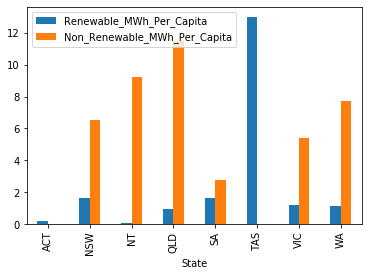

In [81]:
energy_production_per_capita.plot(x="State", y=["Renewable_MWh_Per_Capita", "Non_Renewable_MWh_Per_Capita"], kind="bar")
plt.savefig('energy_production_per_capita')

In [83]:
energy_progression_merged.head()

,State,Renewable_Energy_Plants_2014_2015,Non_Renewable_Energy_Plants_2014_2015,Renewable_Energy_Plants_2017_2018,Non_Renewable_Energy_Plants_2017_2018,Renewable_Energy_Plants_2020_2021,Non_Renewable_Energy_Plants_2020_2021
0,ACT,4,0.0,3,0.0,5,0.0
1,NSW,38,32.0,45,28.0,64,22.0
2,NT,2,13.0,2,64.0,3,63.0
3,QLD,14,30.0,14,32.0,46,65.0
4,SA,10,13.0,12,12.0,16,15.0


In [87]:
act = energy_progression_merged[energy_progression_merged["State"] == "ACT"]
nsw = energy_progression_merged[energy_progression_merged["State"] == "NSW"]
nt = energy_progression_merged[energy_progression_merged["State"] == "NT"]
qld = energy_progression_merged[energy_progression_merged["State"] == "QLD"]
sa = energy_progression_merged[energy_progression_merged["State"] == "SA"]
tas = energy_progression_merged[energy_progression_merged["State"] == "TAS"]

TypeError: unhashable type: 'numpy.ndarray'

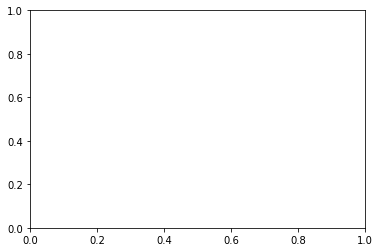

In [88]:
plt.plot(act)
plt.plot(nsw)
plt.plot(nt)
plt.plot(qld)
plt.plot(sa)
plt.plot(tas)

labels = ["ACT", "NSW", "NT", "QLD", "SA", "TAS"]

plt.title("Renewable Energy Production 2014-2021")
plt.xlabel("Year")
plt.ylabel("No of Plants")
plt.legend(labels, bbox_to_anchor=(1.0, 1), loc='best')
plt.savefig("energy_progression")

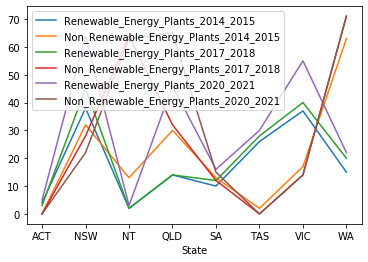

In [85]:
energy_progression_merged.plot.line(x="State", y=["Renewable_Energy_Plants_2014_2015", "Non_Renewable_Energy_Plants_2014_2015", "Renewable_Energy_Plants_2017_2018", "Non_Renewable_Energy_Plants_2017_2018", "Renewable_Energy_Plants_2020_2021", "Non_Renewable_Energy_Plants_2020_2021"])